In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from datetime import datetime

In [2]:
# load in the csv file, you need to specify the directory of the data file
infile = '../data/interim/YSI/Moorings/cleaned_mooring_AC_NYCC.csv'
# colnames = ['Temp_AC','Sal_AC','Fluor_AC','Chl_AC','Temp_NY','Sal_NY','Fluor_NY','Chl_NY','Temp_NY_btm','Sal_NY_btm','Fluor_NY_btm','Chl_NY_btm','DateTime_NY']
data = pd.read_csv(infile, skiprows = [12,14], parse_dates=['DateTime_NY'], infer_datetime_format=True, sep = ',')

In [3]:
data.shape

(11712, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11712 entries, 0 to 11711
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Temp_AC          8914 non-null   float64       
 1   Sal_AC           7491 non-null   float64       
 2   Fluor_AC         8950 non-null   float64       
 3   Chl_AC           8950 non-null   float64       
 4   Temp_NY          11701 non-null  float64       
 5   Sal_NY           11328 non-null  float64       
 6   Fluor_NY         11663 non-null  float64       
 7   Chl_NY           11663 non-null  float64       
 8   Temp_NY_btm      11710 non-null  float64       
 9   Sal_NY_btm       10555 non-null  float64       
 10  Fluor_NY_btm     11710 non-null  float64       
 11  Chl_NY_btm       11710 non-null  float64       
 12  DateTime_AC      11712 non-null  object        
 13  DateTime_NY      11712 non-null  datetime64[ns]
 14  DateTime_NY_btm  11712 non-null  objec

In [5]:
# replace -99 with NaN
data.replace(-99, np.nan, inplace=True)
data.replace(-105.744, np.nan, inplace=True)

In [6]:
data.describe()

,Temp_AC,Sal_AC,Fluor_AC,Chl_AC,Temp_NY,Sal_NY,Fluor_NY,Chl_NY,Temp_NY_btm,Sal_NY_btm,Fluor_NY_btm,Chl_NY_btm
count,8914.000000,7491.000000,8950.000000,8950.000000,11701.000000,11328.000000,11663.000000,11663.000000,11709.000000,10555.000000,11655.000000,11710.000000
mean,28.043836,17.062591,39.930245,52.191802,26.578500,18.834190,29.637282,40.490762,26.177202,19.441278,40.860178,52.502185
std,3.503258,2.013355,35.113883,39.917462,2.803318,1.825875,37.870563,43.051256,3.390828,2.125041,75.101953,85.866109
min,16.990000,11.000000,5.323200,12.850514,18.970000,15.130000,2.790000,9.970772,15.570000,13.970000,5.870000,-105.744100
25%,26.942500,15.850000,20.366950,29.952249,24.820000,17.407500,12.750000,21.293300,23.910000,17.580000,16.380000,25.419884
50%,29.180000,17.170000,29.973200,40.872634,27.340000,18.795000,18.010000,27.272868,26.810000,19.430000,20.910000,30.569588
75%,30.390000,18.620000,46.104450,59.210639,28.680000,20.020000,28.520000,39.220636,28.220000,21.180000,40.490000,52.407516
max,34.830000,21.170000,390.660700,450.902184,32.110000,23.330000,397.910000,459.143188,40.750000,24.230000,912.300000,1043.901740


In [7]:
cols= ['Temp_AC','Temp_NY','Sal_AC','Sal_NY','Chl_AC','Chl_NY','DateTime_NY']
data = data[cols]

#### plot variables against datetime

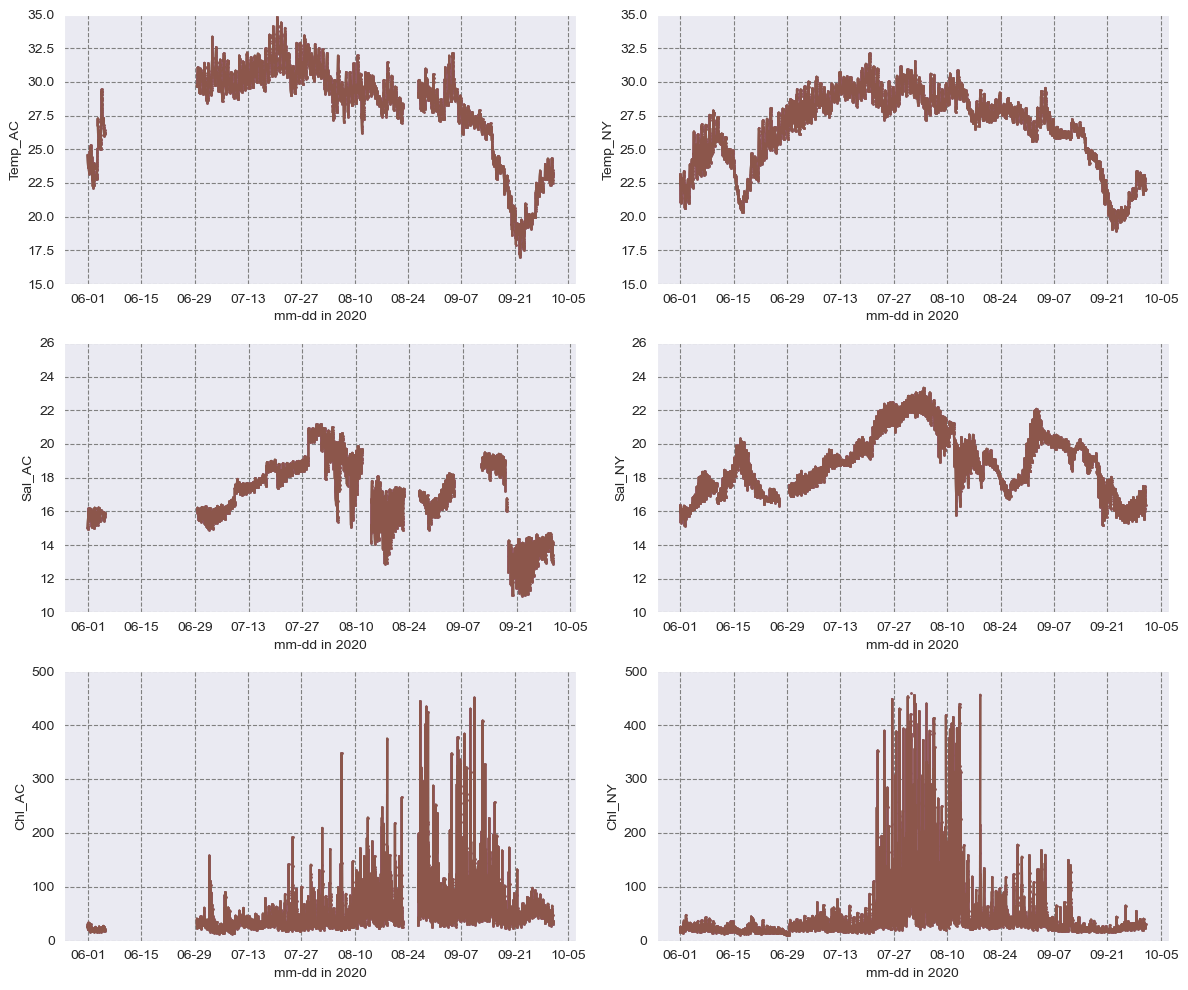

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
nrows, ncols = 3, 2
y_limits = [(15, 35), (15, 35), (10, 26), (10, 26), (0, 500), (0, 500)]
i_range = [0,1,2]
j_range = [0,1]
for n in range(1, 7):
    for i in i_range:
        for j in j_range:
            axes[i,j] = plt.subplot(nrows, ncols, n)
            axes[i,j].plot(data['DateTime_NY'], data.iloc[:,n-1], marker='o', markersize=0.5)
            axes[i,j].set_xlabel('mm-dd in 2020')
            axes[i,j].set_ylabel(data.columns[n-1])
            axes[i,j].set_ylim(y_limits[n-1] )
            axes[i,j].grid(True, color='gray', linestyle='--')
            axes[i,j].xaxis.set_major_locator(mdates.DayLocator(interval=14)) # Set the y-axis tick locator and formatter
            axes[i,j].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
            xticks = [np.arange(dt.datetime(2020, 6, 1), dt.datetime(2020, 10, 6), dt.timedelta(days=14))]
            date_vector = np.ravel(xticks) # Flatten the numpy array into a one-dimensional vector
            axes[i,j].set_xticks(date_vector)

plt.tight_layout()
plt.show()